In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/nlp_liflow/

Mounted at /content/drive
/content/drive/My Drive/nlp_liflow


In [2]:
import textrank_git
from textrank_git import rank
from textrank_git import sentence
from textrank_git import summarizer
from textrank_git import utils
from textrank_git import word
import re
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import logging
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from ast import literal_eval
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [4]:
item_all = pd.read_csv("df_all.csv",index_col=0)

In [5]:
item_all['cluster'] =item_all['cluster'].replace(4,3)
item_all['cluster']= item_all['cluster'].replace(5,4)
item_all['cluster']= item_all['cluster'].replace(7,6)
item_all['cluster']= item_all['cluster'].replace(8,9)
item_all['cluster']=item_all['cluster'].replace(9,8)
item_all['cluster']=item_all['cluster'].replace(12,9)
item_all['cluster']=item_all['cluster'].replace(13,10)

In [6]:
item_all['token'] = item_all['token'].apply(lambda a: a.replace('\'', ''))
item_all['token'] = item_all['token'].apply(lambda a: a.replace('[', ''))
item_all['token'] = item_all['token'].apply(lambda a: a.replace(']', ''))
item_all['token'] = item_all['token'].apply(lambda a: a.split(sep=","))

In [95]:
item_all['vec'] = item_all['vec'].apply(lambda a: a.replace('\n', ''))
item_all['vec'] = item_all['vec'].apply(lambda a: a.replace('[array([', ''))
item_all['vec'] = item_all['vec'].apply(lambda a: a.replace('])]', ''))
item_all['vec'] = item_all['vec'].apply(lambda a: a.replace('.        ', ''))
item_all['vec'] = item_all['vec'].apply(lambda a: a.replace('       ', ''))
item_all['vec'] = item_all['vec'].apply(lambda a: a.replace(' ', ''))
item_all['vec'] = item_all['vec'].apply(lambda a: a.split(sep=","))

In [96]:
item_all['vec'] = item_all['vec'].apply(lambda a: list(map(float, a)))   

In [97]:
item_all['vec']

0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.24570682, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
3      [0.0, 0.16497707, 0.0, 0.0, 0.0, 0.0, 0.164977...
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                             ...                        
159    [0.0, 0.20038284, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
160    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
161    [0.19079942, 0.0, 0.0, 0.0, 0.0, 0.0, 0.161458...
162    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
163    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: vec, Length: 114, dtype: object

In [7]:
model = Doc2Vec.load('first_embedding_clustering.model')

In [8]:
common_texts_and_tags = [
    (token, i) for i, token in zip(item_all['cluster'], item_all['token'])
]
doc_vec = pd.DataFrame(columns=['cluster','text','trained_vector','token'])
for (text, tags),convrs in zip(common_texts_and_tags, item_all['convrs']):
    infer_doc_vec = model.infer_vector(text) #같은 문서를 모델에 다시 넣어서 옳게 임베딩을 진행했는지 확인해보기
    new_row = pd.DataFrame([[tags, text, infer_doc_vec, convrs]], columns = doc_vec.columns)
    doc_vec = pd.concat([doc_vec, new_row], ignore_index = True)
    print(f"tags: {tags}, text: {text}")
    print(f"inferred_doc_vec: {infer_doc_vec}")
    print("--"*20)

tags: 0, text: ['신경', ' 써야', ' 동산', ' 좋아하', ' 요즘', ' 더우', ' 학교', ' 운동장', ' 마음', ' 마음', ' 일상', ' 생각', ' 바깥', ' 끌어내', ' 몸무게', ' 사이', ' 삼사', ' 어쨌', ' 나오']
inferred_doc_vec: [-0.41852403 -0.28544015 -1.019257    0.43840852 -0.3531897  -0.73053885
  0.13862096  0.31882626  0.5593417   0.28970456]
----------------------------------------
tags: 0, text: ['강둑', ' 사람', ' 만약', ' 수영장', ' 해도', ' 시간', ' 맞춰야', ' 힘들', ' 수영', ' 수영장', ' 해도', ' 사람', ' 보통', ' 타고난', ' 체질', ' 체질', ' 문화', ' 센터', ' 강좌', ' 열려', ' 수영', ' 스포츠', ' 정도', ' 그렇', ' 스포츠', ' 시작']
inferred_doc_vec: [ 0.34645057 -0.35697612 -0.79849625  0.18347985  0.14350784 -0.5600877
  0.21592699 -0.575466    0.47909397  0.42355233]
----------------------------------------
tags: 0, text: ['운동', ' 선수', ' 슬럼프', ' 나갈', ' 관리', ' 프로', ' 인식', ' 조절', ' 해야', ' 필요', ' 컨디션', ' 조절', ' 해야지', ' 컨디션', ' 조절', ' 부분', ' 여름철', ' 스포츠', ' 제일', ' 현실', ' 골프', ' 프로그램', ' 골프', ' 프로그램', ' 스포츠', ' 야구', ' 운동', ' 무릎', ' 무리', ' 조심', ' 고민', ' 운동', ' 한다꼬', ' 걱정', ' 스포츠', ' 조절', ' 

In [11]:
doc_vec

,cluster,text,trained_vector,token
0,0,"[신경, 써야, 동산, 좋아하, 요즘, 더우, 학교, 운동장, 마음,...","[-0.41852403, -0.28544015, -1.019257, 0.438408...",그러니까 우리도 정말 신경 많이 써야 될 것 같아 제가 그거 요즘 하잖아요또 동산을...
1,0,"[강둑, 사람, 만약, 수영장, 해도, 시간, 맞춰야, 힘들, 수영,...","[0.34645057, -0.35697612, -0.79849625, 0.18347...",그렇게 매일 비가 오나 눈이 오나 강둑을 걷는 사람들 있잖아내가 만약 수영장 끊어서...
2,0,"[운동, 선수, 슬럼프, 나갈, 관리, 프로, 인식, 조절, 해야, ...","[0.023618966, -0.19006364, -0.29426238, 0.1620...",운동선수들도 보면 슬럼프도 있고 잘 나갈 때도 있고 그게 다 있잖아요나도 그러니까 ...
3,0,"[그동안, 안다는, 문자, 사람, 어울리, 골프, 골프, 연결, 일어...","[-0.35316232, -0.40420935, -0.25387704, -0.209...",그런데 내가 그동안 말은 안 했지만 당신을 내가 너무 잘 안다는 게 문자라니까 당신...
4,0,"[나라, 사람, 사람, 보편, 대중, 주위, 골프, 사람, 시린, ...","[0.11855649, -0.39776966, -0.54816175, 0.01409...",우리나라 사람들 보면 그렇게 하는 사람들이 많거든물론 보편화 되고 대중화됐지지금도 ...
...,...,...,...,...
112,10,"[골프, 구경, 헬스, 단위, 나가, 탁구, 아파트, 단지, 탁구장,...","[-0.15954739, -0.1936944, -0.4906433, 0.088613...",나는 골프를 못 치니까 좀 그런데 너도 직접 하는 것보다 구경하는 편이잖아나도 헬스...
113,10,"[하루, 실력, 사람, 재미없, 여자, 틀리, 친구, 틀리, 이스, ...","[-0.16420703, -0.11981719, -0.34446856, 1.0386...",나는 하루에 한 번 씩 이렇게 잡아주면 실력이 엄청 늘을 것 같은디도 우리랑 못 치...
114,10,"[얼마, 유튜브, 시간, 건강, 탁구장, 친구, 만나, 친구, 새기,...","[0.175068, -0.23980774, -0.9851756, 0.08793755...",나도 본 지 얼마 안됐거든 유튜브를 너무 진짜 시간도 잘 가고 건강에도 좋고 너무 ...
115,10,"[신체, 무리, 방법, 나가, 나가, 유지, 시간, 그만뒀, 한다는,...","[-0.13820143, -0.46155483, -0.8595228, -0.0639...",돈 안 들고 신체적으로 별로 무리가 안 되니까 그게 가장 좋은 방법이지그것도 나가든...


In [12]:
x_train= []
y_train=[]
for q,label in zip(doc_vec['trained_vector'], doc_vec['cluster'])  :
    x_train.append(q)
    y_train.append(label)
'''

x_validation = []
y_validation = []
for q, a, label in zip(df_validation['x'],df_validation['y'], df_validation['cluster'])  :
    val = []
    val.append(q)
    val.append(a)
    x_validation.append(val)
    y_validation.append(label)
'''

"\n\nx_validation = []\ny_validation = []\nfor q, a, label in zip(df_validation['x'],df_validation['y'], df_validation['cluster'])  :\n    val = []\n    val.append(q)\n    val.append(a)\n    x_validation.append(val)\n    y_validation.append(label)\n"

In [13]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [14]:
x_train[0]

array([-0.41852403, -0.28544015, -1.019257  ,  0.43840852, -0.3531897 ,
       -0.73053885,  0.13862096,  0.31882626,  0.5593417 ,  0.28970456],
      dtype=float32)

In [15]:
from keras.preprocessing import sequence
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train) # one_hot으로 변형
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [18]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(
    units=11,
    input_shape=(10,),
    kernel_regularizer=tf.keras.regularizers.l1_l2(0.003, 0.005),
    activation='softmax'))
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_split=0.5 , callbacks=[tf.keras.callbacks.EarlyStopping()])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                121       
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
6/6 [==============================] - 1s 48ms/step - loss: 2.5279 - accuracy: 0.2069 - val_loss: 2.7104 - val_accuracy: 0.0169
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 2.5058 - accuracy: 0.2069 - val_loss: 2.7240 - val_accuracy: 0.0169


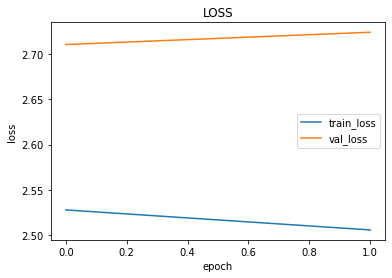

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('LOSS')
plt.show()

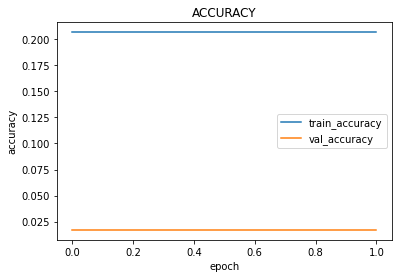

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.title('ACCURACY')
plt.show()

In [107]:
model.evaluate(x_validation, y_validation, verbose=2)

NameError: ignored